In [201]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [202]:
import io

In [203]:
from google.colab import files
uploaded = files.upload()

Saving CAT.csv to CAT.csv


In [205]:
df = pd.read_csv(io.BytesIO(uploaded['CAT.csv']))
print(df)

           Date        Open        High         Low       Close   Adj Close  \
0      1/4/2010   57.650002   59.189999   57.509998   58.549999   40.336735   
1      1/5/2010   58.549999   59.439999   58.230000   59.250000   40.818954   
2      1/6/2010   59.180000   59.930000   59.049999   59.430000   40.942982   
3      1/7/2010   59.299999   59.900002   58.650002   59.669998   41.108299   
4      1/8/2010   59.250000   60.369999   59.250000   60.340000   41.569908   
...         ...         ...         ...         ...         ...         ...   
2635  6/23/2020  127.389999  127.570000  125.830002  126.250000  116.270164   
2636  6/24/2020  124.790001  124.839996  121.830002  122.059998  112.411362   
2637  6/25/2020  121.610001  124.830002  120.800003  124.709999  114.851898   
2638  6/26/2020  124.330002  124.440002  121.449997  122.389999  112.715286   
2639  6/29/2020  123.720001  126.040001  123.279999  125.250000  115.349205   

         Average  
0      54.647347  
1      55.257

In [206]:
data_training = df[df['Date'] < '2020-03-15'].copy()
data_testing = df[df['Date'] >= '2020-03-15'].copy()

In [207]:
data_training = data_training.drop(['Date'], axis = 1)

In [208]:
scaler = MinMaxScaler()
data_training = scaler.fit_transform(data_training)
data_training

array([[0.05283454, 0.059459  , 0.05904151, 0.0646907 , 0.04535485,
        0.05592238],
       [0.06021823, 0.06152069, 0.0651057 , 0.0705187 , 0.04963129,
        0.06110347],
       [0.06538683, 0.0655616 , 0.07201212, 0.07201733, 0.0507312 ,
        0.06491267],
       ...,
       [0.64353097, 0.65157514, 0.64895145, 0.6449921 , 0.72555775,
        0.66742521],
       [0.61030433, 0.63128811, 0.61248213, 0.60353008, 0.68525469,
        0.63285656],
       [0.56083351, 0.59590957, 0.57719196, 0.61160602, 0.69310508,
        0.61137528]])

In [209]:
x_train = []
y_train = []

for i in range(60, data_training.shape[0]):
    x_train.append(data_training[i-20:i])
    y_train.append(data_training[i, 0])

x_train = np.array(x_train)
y_train = np.array(y_train)

In [210]:
x_train.shape

(1008, 20, 6)

In [211]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional

In [212]:
regressorGRU = Sequential()

regressorGRU.add(GRU(units = 60, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 6)))
regressorGRU.add(Dropout(0.2))

regressorGRU.add(GRU(units = 60, activation = 'relu', return_sequences = True))
regressorGRU.add(Dropout(0.2))

regressorGRU.add(GRU(units = 80, activation = 'relu', return_sequences = True))
regressorGRU.add(Dropout(0.2))

regressorGRU.add(GRU(units = 120, activation = 'relu'))
regressorGRU.add(Dropout(0.2))

regressorGRU.add(Dense(units = 1))

In [213]:
regressorGRU.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_32 (GRU)                (None, 20, 60)            12240     
                                                                 
 dropout_32 (Dropout)        (None, 20, 60)            0         
                                                                 
 gru_33 (GRU)                (None, 20, 60)            21960     
                                                                 
 dropout_33 (Dropout)        (None, 20, 60)            0         
                                                                 
 gru_34 (GRU)                (None, 20, 80)            34080     
                                                                 
 dropout_34 (Dropout)        (None, 20, 80)            0         
                                                                 
 gru_35 (GRU)                (None, 120)              

In [214]:
regressorGRU.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressorGRU.fit(x_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
32/32 [==============================] - 7s 45ms/step - loss: 0.0338
Epoch 2/50
32/32 [==============================] - 2s 65ms/step - loss: 0.0056
Epoch 3/50
32/32 [==============================] - 2s 55ms/step - loss: 0.0055
Epoch 4/50
32/32 [==============================] - 1s 44ms/step - loss: 0.0042
Epoch 5/50
32/32 [==============================] - 1s 44ms/step - loss: 0.0048
Epoch 6/50
32/32 [==============================] - 1s 44ms/step - loss: 0.0037
Epoch 7/50
32/32 [==============================] - 1s 44ms/step - loss: 0.0033
Epoch 8/50
32/32 [==============================] - 1s 45ms/step - loss: 0.0043
Epoch 9/50
32/32 [==============================] - 1s 44ms/step - loss: 0.0036
Epoch 10/50
32/32 [==============================] - 2s 64ms/step - loss: 0.0034
Epoch 11/50
32/32 [==============================] - 2s 56ms/step - loss: 0.0035
Epoch 12/50
32/32 [==============================] - 1s 45ms/step - loss: 0.0034
Epoch 13/50
32/32 [==================

In [215]:
data_testing.head()

,Date,Open,High,Low,Close,Adj Close,Average
38,3/1/2010,57.330002,58.389999,57.250000,57.849998,40.126385,54.189277
39,3/2/2010,58.279999,58.820000,58.020000,58.150002,40.334488,54.720898
40,3/3/2010,58.450001,59.930000,58.389999,58.570000,40.625805,55.193161
41,3/4/2010,58.790001,59.000000,57.810001,58.450001,40.542572,54.918515
42,3/5/2010,59.410000,59.580002,58.900002,59.230000,41.083591,55.640719


In [216]:
past_20_days = data_testing.tail(20)

In [217]:
df = past_20_days.append(data_testing, ignore_index = True)
df = df.drop(['Date'], axis = 1)
df.head()

<ipython-input-217-08f6f3976b94>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = past_20_days.append(data_testing, ignore_index = True)


,Open,High,Low,Close,Adj Close,Average
0,121.839996,123.820000,121.279999,123.320000,113.571777,120.766354
1,125.449997,127.349998,125.010002,127.089996,117.043755,124.388750
2,125.410004,129.029999,124.739998,128.960007,118.765953,125.381192
3,137.850006,139.369995,133.389999,135.119995,124.439011,134.033801
4,135.320007,139.940002,135.320007,137.720001,126.833481,135.026700


In [218]:
inputs = scaler.transform(df)
inputs

array([[0.57945683, 0.59244596, 0.59614252, 0.60394639, 0.69482228,
        0.61710197],
       [0.6090737 , 0.62155694, 0.62755836, 0.63533425, 0.72561268,
        0.64784675],
       [0.6087456 , 0.63541148, 0.62528426, 0.65090341, 0.74088559,
        0.65627002],
       ...,
       [0.57756992, 0.60077519, 0.59209977, 0.61551911, 0.70617473,
        0.62214372],
       [0.59988513, 0.59755896, 0.59757432, 0.59620348, 0.68722669,
        0.61963719],
       [0.59488061, 0.61075374, 0.61298746, 0.62001499, 0.71058497,
        0.63374993]])

In [219]:
x_test = []
y_test = []

for i in range(20, inputs.shape[0]):
    x_test.append(inputs[i-20:i])
    y_test.append(inputs[i,0])

x_test = np.array(x_test)
y_test = np.array(y_test)
x_test.shape, y_test.shape

((1572, 20, 6), (1572,))

In [220]:
x_test.shape

(1572, 20, 6)

In [221]:
y_pred = regressorGRU.predict(x_test)

50/50 [==============================] - 1s 13ms/step


In [222]:
scaler.scale_

array([0.00820412, 0.00824674, 0.00842247, 0.0083257 , 0.00886826,
       0.00848742])

In [223]:
scale = 1 / 0.00820412
scale

121.88997723095224

In [224]:
y_pred = y_pred * scale
y_test = y_test * scale

In [225]:
y_pred.shape

(1572, 1)

In [226]:
y_test.shape

(1572,)

In [227]:
y_pred[1503:]

array([[41.289955],
       [39.611042],
       [40.071976],
       [41.77843 ],
       [44.09898 ],
       [45.192745],
       [46.558353],
       [48.73752 ],
       [49.768116],
       [50.860718],
       [51.575783],
       [53.521286],
       [55.709293],
       [57.44806 ],
       [58.796608],
       [57.074802],
       [55.579388],
       [53.56754 ],
       [52.23088 ],
       [52.43458 ],
       [52.479496],
       [51.368656],
       [50.700275],
       [50.781464],
       [51.09983 ],
       [51.282703],
       [52.140636],
       [53.466778],
       [53.82154 ],
       [52.789936],
       [51.04205 ],
       [50.060085],
       [49.297623],
       [48.739872],
       [48.988937],
       [48.975994],
       [48.309635],
       [47.13932 ],
       [46.26778 ],
       [46.348343],
       [48.62194 ],
       [50.01542 ],
       [51.151764],
       [51.74746 ],
       [51.646923],
       [52.647446],
       [54.548786],
       [56.03416 ],
       [56.07357 ],
       [56.081524],


In [228]:
y_test[1503:]

array([42.68999257, 44.84998805, 49.9599868 , 53.6399859 , 53.219988  ,
       55.11998954, 59.51998946, 60.87998213, 60.01998934, 64.2899853 ,
       68.82998519, 71.67998249, 71.77998147, 77.43997609, 68.73998121,
       65.28998505, 61.74998492, 60.63998419, 63.23998255, 63.22998756,
       59.82998739, 60.81998515, 60.11998832, 62.77998367, 59.63998443,
       66.64998572, 65.74998394, 66.78998469, 62.78998566, 58.80998364,
       58.02998483, 58.81998563, 57.80998388, 57.75998789, 58.9499906 ,
       57.89998786, 53.92998683, 51.28998847, 53.96998782, 61.0099871 ,
       63.73998243, 62.09998383, 63.73998243, 62.91998263, 64.76998818,
       68.50998527, 73.53998304, 68.41998129, 68.64998523, 70.62997975,
       74.23997987, 74.19998688, 86.63998584, 84.10998746, 83.80998453,
       82.50998185, 75.19998663, 73.18998512, 67.29998656, 80.15997642,
       78.94998572, 75.92998146, 78.78998176, 75.14998365, 76.17998139,
       73.57998403, 70.39998481, 73.11998514, 72.50998429])

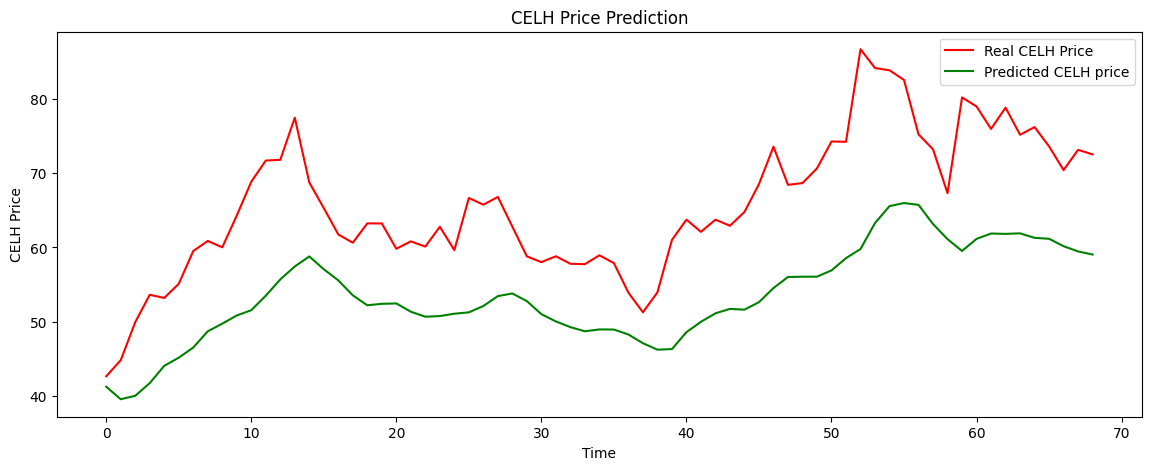

In [229]:
plt.figure(figsize = (14,5))
plt.plot(y_test[1503:], color = 'red', label = 'Real CELH Price')
plt.plot(y_pred[1503:], color = 'green', label = 'Predicted CELH price')
plt.title('CELH Price Prediction')
plt.xlabel('Time')
plt.ylabel('CELH Price')
plt.legend()
plt.show()